# Topological Data Analysis (TDA)
Topological data analysis (TDA) is a collection of methods for analyzing datasets that have an underlying topological structure. The goal of TDA is to describe the shape of data, and to find the best possible summary (invarient) of that shape in a way that is robust to noise and other "nuisance" parameters. TDA is a relatively new field, and is an active area of research in applied mathematics and statistics.

## Topological Spaces
A topological space is a set $X$ together with a collection of subsets of $X$ called open sets. The open sets must satisfy the following axioms:
1. The empty set $\emptyset$ and $X$ are open.
2. The union of any collection of open sets is open.
3. The intersection of any finite collection of open sets is open.

A topological space is a generalization of the notion of an open subset of $\mathbb{R}^n$. For example, the open interval $(0,1)$ is an open subset of $\mathbb{R}$, and the open ball $B(0,1)$ is an open subset of $\mathbb{R}^2$. The collection of all open subsets of $\mathbb{R}^n$ is called the standard topology on $\mathbb{R}^n$.

## Simplicial Complexes
A simplicial complex is a topological space that is constructed from a collection of simplices. A simplex is a generalization of a triangle or tetrahedron to arbitrary dimensions. A $0$-simplex is a point, a $1$-simplex is a line segment, a $2$-simplex is a triangle, a $3$-simplex is a tetrahedron, and so on. A $k$-simplex is the convex hull of $k+1$ affinely independent points in $\mathbb{R}^n$. For example, a $2$-simplex is the convex hull of $3$ affinely independent points in $\mathbb{R}^2$, and is therefore a triangle.

![filtration](figures/lec3_filtration.png)

## Persistent Homology
Persistent homology is a method for computing topological invariants of a dataset. The basic idea is to construct a simplicial complex from the data, and then compute the homology groups of the simplicial complex. The homology groups are a collection of invariants that describe the shape of the simplicial complex. The homology groups are a sequence of vector spaces, and the dimension of each vector space is called the Betti number. The Betti numbers are the topological invariants that we are interested in.

The homology groups are computed by constructing a chain complex of vector spaces. The chain complex is a sequence of vector spaces and linear maps between them. The homology groups are the vector spaces that are the kernels of the linear maps. The chain complex is constructed from the simplicial complex by assigning a vector space to each simplex, and a linear map to each pair of simplices. The vector space assigned to a simplex is called the chain group of the simplex, and the linear map assigned to a pair of simplices is called the boundary map of the pair of simplices.

The chain complex is constructed by assigning a vector space to each simplex, and a linear map to each pair of simplices. The vector space assigned to a simplex is called the chain group of the simplex, and the linear map assigned to a pair of simplices is called the boundary map of the pair of simplices. The chain complex is constructed by assigning a vector space to each simplex, and a linear map to each pair of simplices. The vector space assigned to a simplex is called the chain group of the simplex, and the linear map assigned to a pair of simplices is called the boundary map of the pair of simplices.


## Persistent Homology of a Point Cloud
The persistent homology of a point cloud is a method for computing the homology groups of a simplicial complex. The simplicial complex is constructed from the point cloud by constructing a simplex for each point in the point cloud, and then constructing a simplex for each pair of points in the point cloud. The simplicial complex is constructed by constructing a simplex for each point in the point cloud, and then constructing a simplex for each pair of points in the point cloud. The simplicial complex is constructed by constructing a simplex for each point in the point cloud, and then constructing a simplex for each pair of points in the point cloud. The simplicial complex is constructed by constructing a simplex for each point in the point cloud, and then constructing a simplex for each pair of points in the point cloud. The simplicial complex is constructed by constructing a simplex for each point in the point cloud, and then constructing a simplex for each pair of points in the point cloud. The simplicial complex is constructed by constructing a simplex for each point in the point cloud, and then constructing a simplex for each pair of points in the point cloud.


## Computations
Constructing a simplicial complex from point cloud data is a fundamental concept in computational topology, particularly in the field of Topological Data Analysis (TDA). The most common approach is to use the Vietoris-Rips complex. 

Let's consider a set of 5 points in a 2D space. We will:

1. Create a set of points.
2. Construct the Vietoris-Rips complex from these points.
3. Visualize the simplicial complex.

We'll use Python for this demonstration. For the construction of the Vietoris-Rips complex, we will use the `GUDHI` library, which is a popular tool in TDA. 

First, ensure you have GUDHI installed:

In [1]:
!pip install gudhi

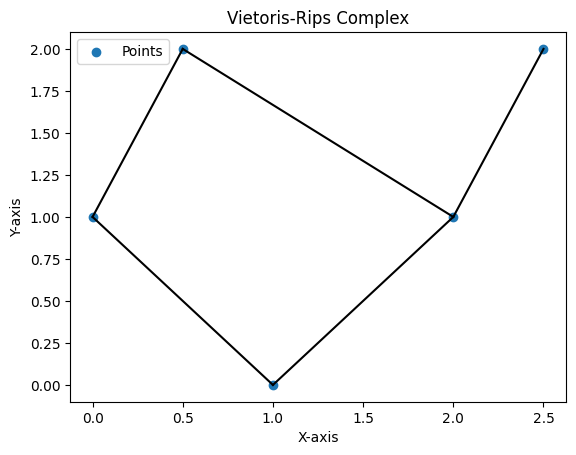

In [9]:
import gudhi as gd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create 5 points
points = np.array([[0, 1], [1, 0], [2, 1], [0.5, 2], [2.5, 2]])

# Step 2: Construct Vietoris-Rips complex
rips_complex = gd.RipsComplex(points=points, max_edge_length=1.9)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Step 3: Visualize the simplicial complex
# Drawing points
plt.scatter(points[:,0], points[:,1], label='Points')

# Drawing edges and triangles
for simplex, _ in simplex_tree.get_filtration():
    if len(simplex) == 2: # Edge
        p1, p2 = simplex
        plt.plot(*zip(points[p1], points[p2]), color='black')
    elif len(simplex) == 3: # Triangle
        p1, p2, p3 = simplex
        triangle = plt.Polygon([points[p1], points[p2], points[p3]], alpha=0.3)
        plt.gca().add_patch(triangle)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vietoris-Rips Complex')
plt.legend()
plt.show()

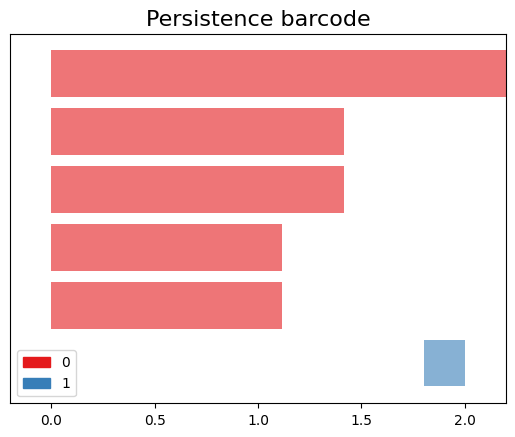

In [10]:
# Construct Vietoris-Rips complex
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence
diagram = simplex_tree.persistence()

# Step 2: Plot Barcode
gd.plot_persistence_barcode(diagram)
plt.show()